## Netflix Data Visualization

### Imports

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#### Load Netflix_titles into the Data Frame

In [2]:
nf = pd.read_csv('netflix_titles.csv')

nf.info()
nf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Top 10 Movies in Netflix

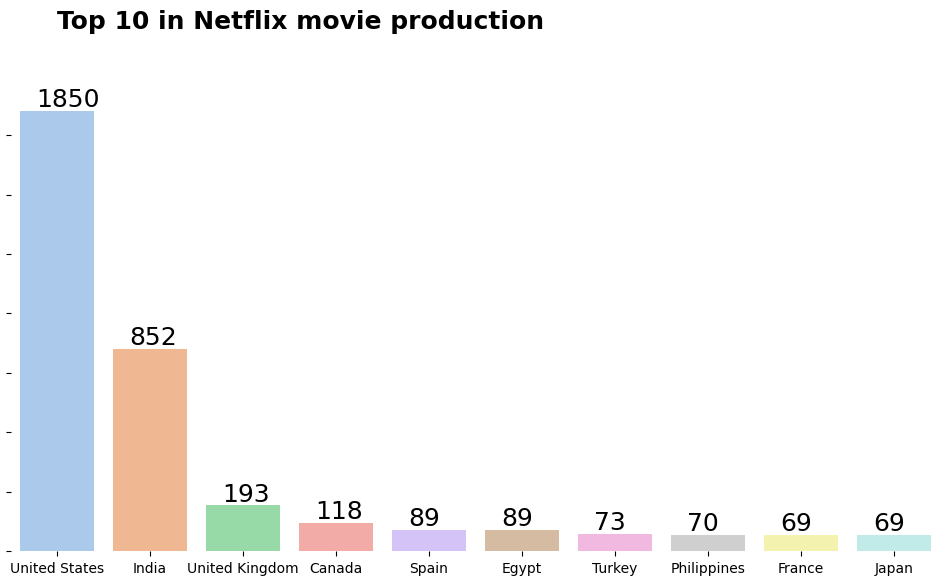

In [8]:

movies_nf = nf[nf['type']=='Movie']

top10 = movies_nf.groupby(['country']).size().sort_values(ascending = False)[0:10]

plt.figure(figsize = (12,6))
g=sns.barplot(x=top10.index,y = top10, palette = 'pastel')
g.text(0,2200, 'Top 10 in Netflix movie production', fontsize = '18', fontweight='bold', color = 'black')
       
for i in ['top','left','right','bottom']:
    g.spines[i].set_visible(False)
       
for i in g.patches:
    g.text(i.get_x() + i.get_width()/4.5, i.get_height()+20, round(i.get_height()), fontsize = '18')
       
g.set(yticklabels=[])
plt.xlabel('')
plt.ylabel('')
       
plt.show()

### Top 10 TV Show in Netflix

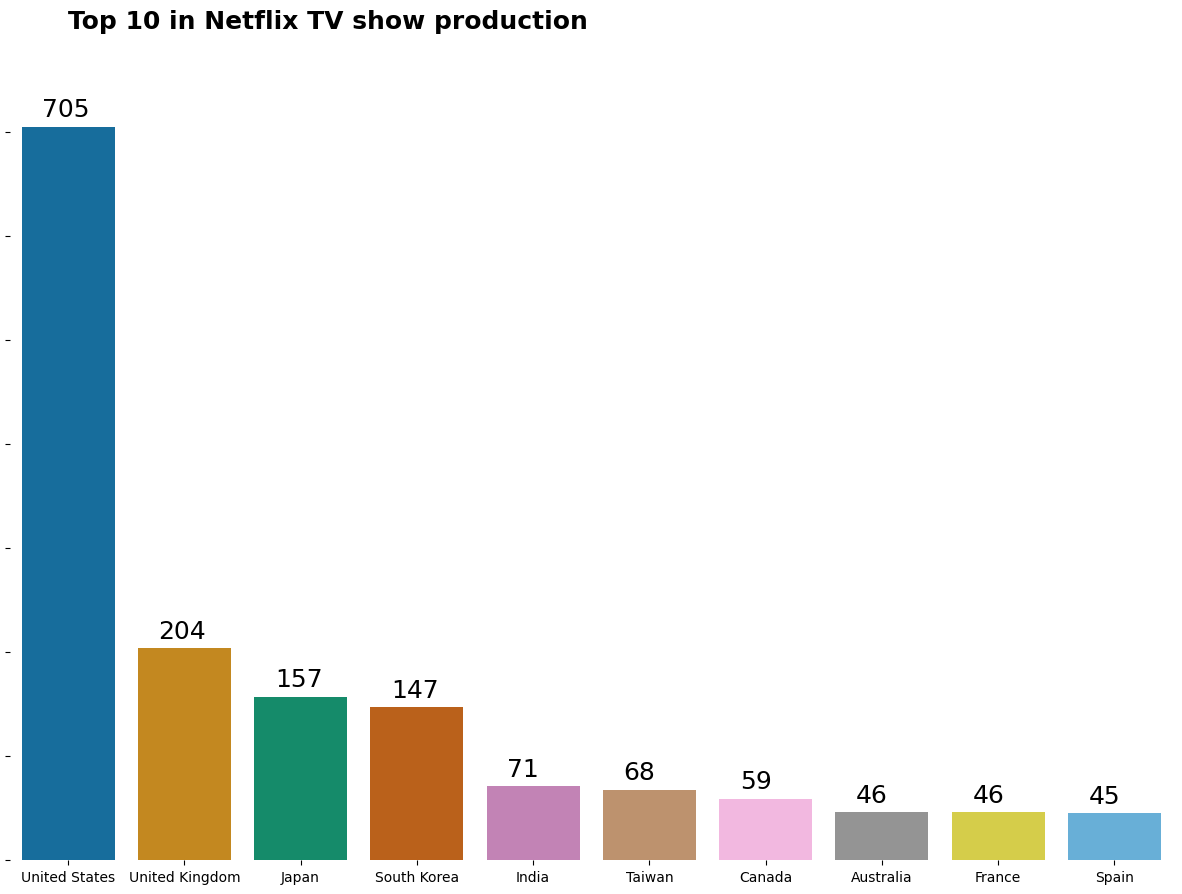

In [14]:
tvshows_nf = nf[nf['type']=='TV Show']

top10countries_tvshows = tvshows_nf.groupby(['country']).size().sort_values(ascending = False)[0:10]

plt.figure(figsize = (15,10))
g=sns.barplot(x=top10countries_tvshows.index,y = top10countries_tvshows, palette = 'colorblind')
g.text(0,800, 'Top 10 in Netflix TV show production', fontsize = 18, fontweight='bold', color='black')
       
for i in ['top','left','right','bottom']:
    g.spines[i].set_visible(False)
       
for i in g.patches:
    g.text(i.get_x() + i.get_width()/4.5, i.get_height()+10, round(i.get_height()), fontsize = '18')
       
g.set(yticklabels=[])
plt.xlabel('')
plt.ylabel('')
       
plt.show()

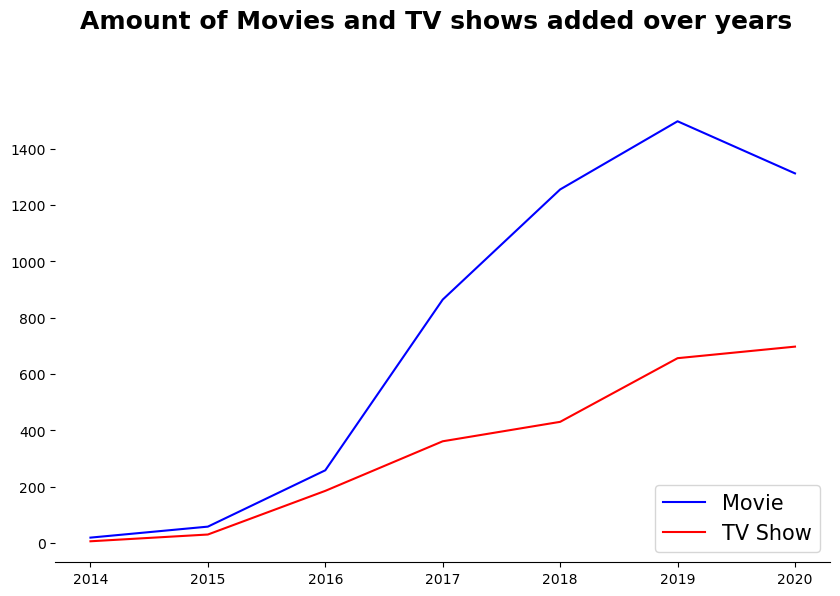

In [42]:
#Create year added
nf['date_added'] = pd.to_datetime(nf['date_added'])
nf['year_added'] = nf['date_added'].dt.year
index = [2014,2015,2016,2017,2018,2019,2020]

#Movies added from 2014 to 2020
ts_df = nf[nf['year_added']>2013]
ts_df = ts_df[ts_df['year_added']<2021].groupby('type')['year_added'].value_counts().unstack().T

fig, ax = plt.subplots(1,1, figsize = (10,6))
fig.text(0.15, 1, 'Amount of Movies and TV shows added over years', fontsize = 18, fontweight = 'bold', color = 'black')

#line chart
g1 = sns.lineplot(x=ts_df.index,y=ts_df['Movie'], color = 'blue', label = 'Movie')
g1 = sns.lineplot(x=ts_df.index,y=ts_df['TV Show'], color = 'red', label = 'TV Show')

for i in ['top','left','right']:
    ax.spines[i].set_visible(False)
    
ax.legend(loc = 'lower right', frameon = 'False', prop = {'size': 15})
plt.xlabel('')
plt.ylabel('')
plt.show()